In [18]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sklearn.metrics as skm

In [2]:
# sigmoid function
# can evaluate numpy arrays
# COMPLETE
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-np.asarray(x)))


# feed-forward network
# evaluate the network output for a given input
# COMPLETE
def feed_forward(weights, biases, inp):
    input_var = inp
    for w, b in zip(weights, biases):
        inp = sigmoid(np.dot(w, inp) + np.tile(b, (1, inp.shape[1])))
    return inp


# update the gradient descent based on the current minibatch
# compute the change in weights and biases based on a single element of the minibatch
# sum all of the changes to get the final change in weight and bias for the whole minibatch
# update the weights and biases
# COMPLETE
def eval_whole_batch(weights, biases, batch_inp, batch_outp, rate, reg_param):
    del_grad_weights, del_grad_biases = backpropagate(weights, biases, batch_inp, batch_outp)
    del_grad_biases = [np.array([np.sum(x, axis=1)]).T for x in del_grad_biases]
    weights = np.array([weight - rate * (
        change / batch_inp.shape[1] + reg_param * weight) for weight, change in zip(weights, del_grad_weights)])
    biases = np.array([bias - (rate / batch_inp.shape[1]) * change for bias, change in zip(biases, del_grad_biases)])
    return weights, biases


# backpropagation
# compute the values for adjusting the weights and biases
# to minimize the error (diff between expected and actual ouput)
# COMPLETE
def backpropagate(weights, biases, inp, outp):
    # feed forward
    input_var = inp
    activation_mat = [input_var]
    out_mat = []
    for w, b in zip(weights, biases):
        out_mat.append(np.dot(w, input_var) + np.tile(b, (1, input_var.shape[1])))
        activation_mat.append(sigmoid(out_mat[-1]))
        input_var = activation_mat[-1]
    # back-propagate
    delta_mat = [0.0 for _ in range(len(weights))]
    del_grad_weights = [np.zeros(weight.shape) for weight in weights]
    del_grad_biases = [np.zeros(bias.shape) for bias in biases]
    delta_mat[-1] = l1_dist(activation_mat[-1], outp)
    del_grad_weights[-1] = np.dot(delta_mat[-1], activation_mat[-2].T)
    del_grad_biases[-1] = delta_mat[-1]
    for i in range(2, len(weights) + 1):
        delta_mat[-i] = np.dot(weights[(-i) + 1].T, delta_mat[(-i) + 1]) * (
            activation_mat[-i] * (1.0 - activation_mat[-i]))
        del_grad_weights[-i] = np.dot(delta_mat[-i], activation_mat[-(i + 1)].T)
        del_grad_biases[-i] = delta_mat[-i]
    return del_grad_weights, del_grad_biases


# calculate L1 distance
def l1_dist(a, b):
    return a - b


# calculate hamming distance
def hamming_dist(a, b):
    return np.count_nonzero(a ^ b)


# calculate the sum of squared errors for two data sets, samples in columns
def calc_sse(mat1, mat2):
#     return np.sum(np.sqrt(np.sum(np.square(mat1 - mat2), axis=0)))/(mat1.shape[0] * mat1.shape[1])
    return np.sum(np.sqrt(np.square(mat1 - mat2))) / (mat1.shape[1])


# mini-batch gradient descent
# calculate the next step toward
# some minimum...hopefully a global one
# COMPLETE
def train_network(num_epochs, batch_inp, batch_outp, learning_rate, reg_rate, layer_sizes, batch_size):
    epochs = range(num_epochs)
    weight_mats = [
        np.random.normal(0, 1.0 / np.sqrt(layer_sizes[i]), (layer_sizes[i + 1], layer_sizes[i])) for i in range(0, len(layer_sizes) - 1)]
    bias_mats = [np.random.normal(0, 0.0001, (layer_sizes[i], 1)) for i in range(1, len(layer_sizes))]
    sse = []
    for i in epochs:
        mini_batches = zip(np.array_split(batch_inp, num_batches, axis=1), 
                           np.array_split(batch_outp, num_batches, axis=1))
        for split_in, split_out in mini_batches:
            weight_mats, bias_mats = eval_whole_batch(
                weight_mats, bias_mats, split_in, split_out, learning_rate, reg_rate)
        sse.append(calc_sse(batch_outp, feed_forward(weight_mats, bias_mats, batch_inp)))
    return weight_mats, bias_mats, sse

[[0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]


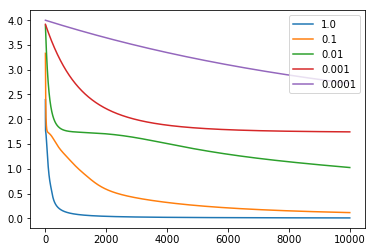

[[ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.]]
0.00762472033543
7.69016912051e-07


In [4]:
sse_lists = []
weights_list = []
biases_list = []
n = 8
# binary_input = np.asarray([list(map(lambda x: int(x), list(num))) for num in [
#     bin(x)[2:].zfill(n) for x in range(int(np.power(2, n)))]])
binary_input = np.asarray([list(map(lambda x: int(x), list(num))) for num in [
    bin(x)[2:].zfill(n) for x in [int(np.power(2, i)) for i in range(0, n)]]])
print(binary_input)
layer_sizes = [n, 3, n]
# learning_rate = 0.01
reg_rate = 0.0
num_epochs = 10000
num_batches = 2
rates = [1.0, 0.1, 0.01, 0.001, 0.0001]
rates_around1 = [10.0, 8.0, 6.0, 4.0, 2.0, 1.0, 0.5, 0.1]
for learning_rate in rates:
    weights, biases, sse = train_network(
        num_epochs, binary_input.T, binary_input.T, learning_rate, reg_rate, layer_sizes, num_batches)
    sse_lists.append(sse)
    weights_list.append(weights)
    biases_list.append(biases)
plt.close()
plt.figure()
for weights, biases, sse, rate in zip(weights_list, biases_list, sse_lists, rates):
    plt.plot(range(num_epochs), sse, label=str(rate))
plt.legend()
plt.show()
plt.close()
print(np.round(feed_forward(weights_list[0], biases_list[0], binary_input.T).T, 1))
print(sse_lists[0][-1])
print(sse_lists[0][-2] - sse_lists[0][-1])

In [129]:
DNA_TO_BIN = {'a':'111', 't':'100', 'c':'010', 'g':'001'}
BIN_TO_DNA = {'111':'a', '100':'t', '010':'c', '001':'g'}


# convert dna sequence to binary sequence
def dna_to_binary(seq):
    return np.array(list(map(lambda x: int(x), ''.join([DNA_TO_BIN[str.lower(x)] for x in list(seq)]))))


# convert sequence lists to training/testing examples
def create_case(seq_list, is_positive_boolean):
    return [(x, is_positive_boolean) for x in seq_list]


# read in positive/test sets
# COMPLETE
def read_txt(fn):
    output = set([])
    with open(fn, 'r') as f:
        for line in f:
            output.add(line.strip())
    return output
            
            
# read in negative examples
# COMPLETE
def read_fasta(fn):
    output = set([])
    with open(fn, 'r') as f:
        next(f)
        current = ''
        print(len(current))
        for line in f:
            if line[0] == '>' and len(current) > 0:
                if '>' in current:
                    print(line)
                    print(current)
                output.add(str(current))
                current = ''
            else:
                current += line.strip()
    return output


# convert each negative sequence to length 17 sequences
def chop_negatives(seq_set):
    output_set = set([])
    while len(seq_set) > 0:
        el = seq_set.pop()
        output_set.update([el[i:i + 17] for i in range(len(el) - 17)])
    return output_set

        
# remove intersections between positive and negative sets,
# but keep instance in positive
# COMPLETE
def clean_negatives(pos_set, neg_set):
    neg_set.difference_update(pos_set)
    return neg_set


# k-fold validation
# given a set of samples, shuffle the order and split it into lists of size 1/k and k-1/k
def create_k_fold(inp_list, k):
    random.shuffle(inp_list)
    sep_point = int(len(inp_list) / k)
    print(sep_point)
    return inp_list[:sep_point], inp_list[sep_point:]


# write output to a file
def write_output(seq_list, score_list, fn):
    out_string = ''
    for seq, val in zip(list(seq_list), score_list):
        out_string += seq + '\t' + str(val) + '\t'
    out_string = out_string[:-2]
    with open(fn, 'w') as f:
        f.write(out_string)



In [6]:
pos_seqs = read_txt('./data/rap1-lieb-positives.txt')
neg_seqs = read_fasta('./data/yeast-upstream-1k-negative.fa')
neg_seqs = chop_negatives(neg_seqs)
print(pos_seqs.isdisjoint(neg_seqs))
neg_seqs = list(clean_negatives(pos_seqs, neg_seqs))
pos_seqs = list(pos_seqs)
neg_cases = np.array([dna_to_binary(x) for x in neg_seqs])
pos_cases = np.array([dna_to_binary(x) for x in pos_seqs])

0
False


In [7]:
# workflow
# clean and generate samples
# separate data into training and test sets
# train network on training set
# evaluate performance on test set

In [69]:
test_neg, training_neg = create_k_fold(neg_cases, 3)
test_pos, training_pos = create_k_fold(pos_cases, 3)
test_neg = [(x, 0) for x in test_neg]
test_pos = [(x, 1) for x in test_pos]
training_neg = [(x, 0) for x in training_neg]
training_pos = [(x, 1) for x in training_pos]

992997
45


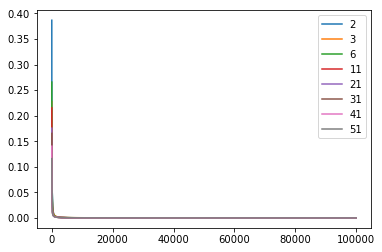

2.34369838301e-05
2.43896936911e-10
2.81095234575e-05
2.93783741285e-10
1.75300666305e-05
1.91722782192e-10
1.34879577178e-05
1.50635837479e-10
1.19028758607e-05
1.33672543036e-10
1.14717405925e-05
1.29220805761e-10
1.11585009942e-05
1.25883868984e-10
1.09754877854e-05
1.24346307712e-10


In [144]:
sse_list = []
weights_list = []
biases_list = []
n = 51
hidden_layers = [2, 3, 6, 11, 21, 31, 41, 51]
# layer_sizes = [n, 51, 1]
learning_rate = 0.1
reg_rate = 0.0
num_epochs = 100000
num_batches = 10
training_set = training_neg[:2000] + training_pos
test_set = test_neg[:2000] + test_pos
random.shuffle(training_set)
random.shuffle(test_set)
for hn_size in hidden_layers:
    layer_sizes = [n, hn_size, 1]
    weights, biases, sse = train_network(
        num_epochs, np.array([x[0] for x in training_set]).T, np.array([[x[1]] for x in training_set]).T, 
        learning_rate, reg_rate, layer_sizes, num_batches)
    sse_list.append(sse)
    weights_list.append(weights)
    biases_list.append(biases)
plt.close()
plt.figure()
for hn_size, sse in zip(hidden_layers, sse_list):
    plt.plot(range(num_epochs), sse, label=str(hn_size))
plt.legend()
plt.show()
plt.close()
# print(np.round(feed_forward(weights_list[0], biases_list[0], binary_input.T).T, 1))
for sse in sse_list:    
    print(sse[-1])
    print(sse[-2] - sse[-1])

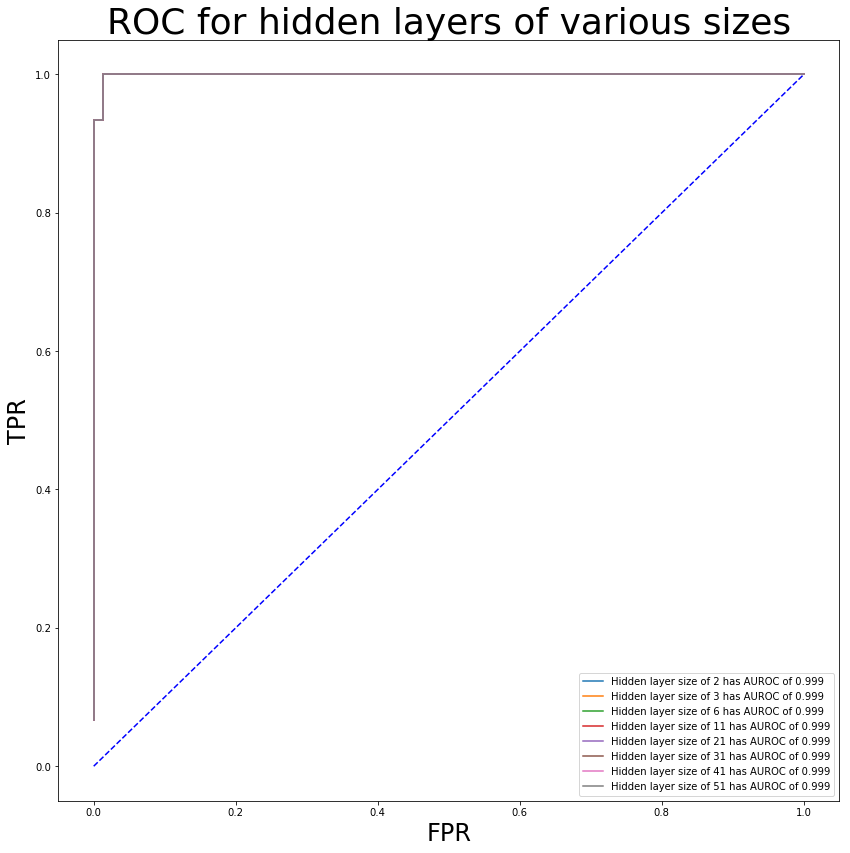

In [147]:
# create lists to store fprs, tprs, and thresholds for all sets of weights and biases
fpr_list = []
tpr_list = []
thresh_list = []
auc_list = []
for weights, biases in zip(weights_list, biases_list):
    fpr, tpr, threshs = skm.roc_curve(
        np.array([[x[1]] for x in test_set]).T[0], feed_forward(
            weights, biases, np.array([x[0] for x in test_set]).T)[0], pos_label=1)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    thresh_list.append(threshs)
    auc_list.append(
        skm.roc_auc_score(np.array([[x[1]] for x in test_set]).T[0], feed_forward(
            weights, biases, np.array([x[0] for x in test_set]).T)[0]))

plt.close()
plt.figure(figsize=(14, 14))
for hn_size, fpr, tpr, auc in zip(hidden_layers, fpr_list, tpr_list, auc_list):
    plt.plot(fpr, tpr, '-', label = 'Hidden layer size of ' + str(hn_size) + ' has AUROC of ' + str(np.round(auc, 3)))
plt.plot([0, 1], [0, 1], 'b--')
plt.title('ROC for hidden layers of various sizes', size=36)
plt.xlabel('FPR', size=24)
plt.ylabel('TPR', size=24)
plt.legend()
plt.show()
plt.close()
# precis, recall, prc_threshs = skm.precision_recall_curve(np.array([[x[1]] for x in test_set]).T[0], feed_forward(weights, biases, 
#                             np.array([x[0] for x in test_set]).T)[0], pos_label=1)
# plt.close()
# plt.figure(figsize=(14, 14))
# plt.plot(recall, precis, 'k-')
# plt.plot([0, 1], [1, 0], 'b--')
# plt.title('PRC for a single hidden layer of 51 nodes', size=36)
# plt.xlabel('Recall', size=24)
# plt.ylabel('Precision', size=24)
# plt.show()
# plt.close()

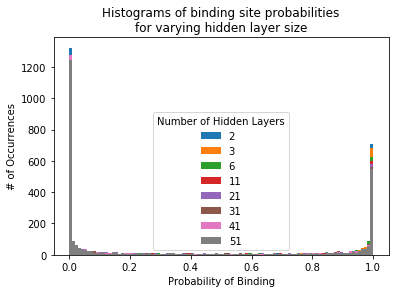

In [149]:
validation_seqs = read_txt('./data/rap1-lieb-test.txt')
validation_binary = np.array([dna_to_binary(x) for x in validation_seqs])
# validation_seqs.shape[1]
val_out = np.round(feed_forward(weights_list[-1], biases_list[-1], validation_binary.T)[0], 3)
write_output(validation_seqs, val_out, 'test_set_output.txt')
vo = []
plt.close()
plt.figure()
plt.title('Histograms of binding site probabilities\nfor varying hidden layer size')
for w, b, hn in zip(weights_list, biases_list, hidden_layers):
    plt.hist(np.round(feed_forward(w, b, validation_binary.T)[0], 3), bins=100, label=str(hn))
plt.legend(title='Number of Hidden Layers')
plt.ylabel('# of Occurrences')
plt.xlabel('Probability of Binding')
plt.show()
plt.close()